## Deciscion Trees and Ensemble Methods

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score


In [2]:
bg_df = pd.read_csv('data/boardgames.csv')

bg_df.sample(5)

,name,description,max_players,min_players,min_playtime,max_playtime,min_age,category,mechanics,year_published,...,mechanic_auctionbidding,mechanic_simulation,mechanic_areamovement,mechanic_simultaneousactionselection,mechanic_actionpointallowancesystem,mechanic_cooperativeplay,mechanic_pointtopointmovement,mechanic_partnerships,mechanic_memory,quality_game
6699,Origin of Failing Water,Origin of Failing Water (è½æ°´é‚¸ç‰©èªž or Ra...,4.0,3.0,30.0,30.0,10.0,CardGame,Tricktaking,2005.0,...,False,False,False,False,False,False,False,False,False,False
3652,24 Game,Players win points by being the first to corre...,8.0,1.0,20.0,20.0,9.0,"Educational, Math, Number, Puzzle",PatternRecognition,1988.0,...,False,False,False,False,False,False,False,False,False,False
856,Flower Power,From the English translation:\n\nThis is an un...,6.0,2.0,10.0,10.0,10.0,"Bluffing, Racing",BettingWagering,1998.0,...,False,False,False,False,False,False,False,False,False,False
2388,Channel Surfing,Split into 2 teams and take alternate turns. T...,99.0,2.0,30.0,30.0,12.0,PartyGame,Partnerships,1994.0,...,False,False,False,False,False,False,False,True,False,False
12580,Hexx & Hopp,The players try to create a structure on the t...,5.0,2.0,20.0,30.0,9.0,AbstractStrategy,TilePlacement,2015.0,...,False,False,False,False,False,False,False,False,False,False


In [3]:
dtc = DecisionTreeClassifier(max_depth = 3) #  Split the sample only three times.

In [4]:
x_names = ['max_players', 'min_players', 'min_playtime', 'max_playtime', 'min_age']

dtc.fit(bg_df[x_names], bg_df['quality_game'])



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(446.4, 380.52, 'min_age <= 9.5\nentropy = 0.5\nsamples = 13720\nvalue = [6860, 6860]'),
 Text(223.2, 271.8, 'max_playtime <= 21.5\nentropy = 0.472\nsamples = 5516\nvalue = [3406, 2110]'),
 Text(111.6, 163.07999999999998, 'min_age <= 7.5\nentropy = 0.436\nsamples = 2404\nvalue = [1633, 771]'),
 Text(55.8, 54.360000000000014, 'entropy = 0.403\nsamples = 1384\nvalue = [997, 387]'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.469\nsamples = 1020\nvalue = [636, 384]'),
 Text(334.79999999999995, 163.07999999999998, 'max_players <= 5.5\nentropy = 0.49\nsamples = 3112\nvalue = [1773, 1339]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.499\nsamples = 1981\nvalue = [1044, 937]'),
 Text(390.59999999999997, 54.360000000000014, 'entropy = 0.458\nsamples = 1131\nvalue = [729, 402]'),
 Text(669.5999999999999, 271.8, 'max_playtime <= 39.0\nentropy = 0.488\nsamples = 8204\nvalue = [3454, 4750]'),
 Text(558.0, 163.07999999999998, 'min_playtime <= 4.5\nentropy = 0.498\nsamples = 2

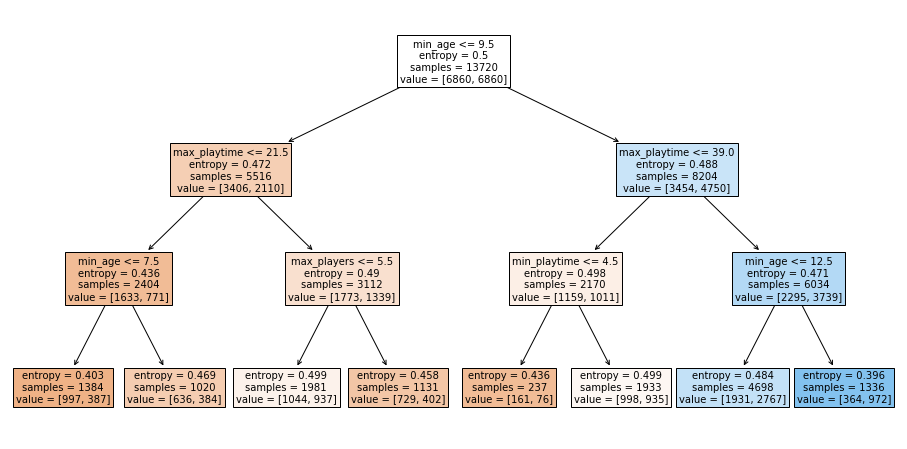

In [5]:
plt.figure(figsize=(16,8))
plot_tree(dtc, feature_names = x_names, fontsize = 10, filled =True)


In [6]:
print(export_text(dtc, feature_names = x_names))

|--- min_age <= 9.50
|   |--- max_playtime <= 21.50
|   |   |--- min_age <= 7.50
|   |   |   |--- class: False
|   |   |--- min_age >  7.50
|   |   |   |--- class: False
|   |--- max_playtime >  21.50
|   |   |--- max_players <= 5.50
|   |   |   |--- class: False
|   |   |--- max_players >  5.50
|   |   |   |--- class: False
|--- min_age >  9.50
|   |--- max_playtime <= 39.00
|   |   |--- min_playtime <= 4.50
|   |   |   |--- class: False
|   |   |--- min_playtime >  4.50
|   |   |   |--- class: False
|   |--- max_playtime >  39.00
|   |   |--- min_age <= 12.50
|   |   |   |--- class: True
|   |   |--- min_age >  12.50
|   |   |   |--- class: True



In [7]:
from sklearn.ensemble import RandomForestClassifier


In [8]:
rf = RandomForestClassifier(max_depth =3 )
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
rf.fit(bg_df[x_names], bg_df['quality_game'])
rf


/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
len(rf.estimators_)

10

In [11]:
print(export_text(rf.estimators_[0], feature_names = x_names))

|--- max_playtime <= 31.00
|   |--- max_playtime <= 21.50
|   |   |--- min_playtime <= 25.00
|   |   |   |--- class: 0.0
|   |   |--- min_playtime >  25.00
|   |   |   |--- class: 1.0
|   |--- max_playtime >  21.50
|   |   |--- min_age <= 7.50
|   |   |   |--- class: 0.0
|   |   |--- min_age >  7.50
|   |   |   |--- class: 0.0
|--- max_playtime >  31.00
|   |--- min_age <= 12.50
|   |   |--- max_players <= 5.50
|   |   |   |--- class: 1.0
|   |   |--- max_players >  5.50
|   |   |   |--- class: 0.0
|   |--- min_age >  12.50
|   |   |--- max_players <= 7.50
|   |   |   |--- class: 1.0
|   |   |--- max_players >  7.50
|   |   |   |--- class: 0.0



[Text(446.4, 380.52, 'min_playtime <= 21.5\nentropy = 0.5\nsamples = 8623\nvalue = [6847, 6873]'),
 Text(223.2, 271.8, 'min_age <= 7.5\nentropy = 0.462\nsamples = 2366\nvalue = [2399, 1365]'),
 Text(111.6, 163.07999999999998, 'min_age <= 2.5\nentropy = 0.419\nsamples = 914\nvalue = [996, 424]'),
 Text(55.8, 54.360000000000014, 'entropy = 0.474\nsamples = 215\nvalue = [213, 134]'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.394\nsamples = 699\nvalue = [783, 290]'),
 Text(334.79999999999995, 163.07999999999998, 'min_playtime <= 2.5\nentropy = 0.481\nsamples = 1452\nvalue = [1403, 941]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.387\nsamples = 216\nvalue = [250, 89]'),
 Text(390.59999999999997, 54.360000000000014, 'entropy = 0.489\nsamples = 1236\nvalue = [1153, 852]'),
 Text(669.5999999999999, 271.8, 'max_players <= 5.5\nentropy = 0.494\nsamples = 6257\nvalue = [4448, 5508]'),
 Text(558.0, 163.07999999999998, 'max_players <= 4.5\nentropy = 0.484\nsamples = 4349\nvalu

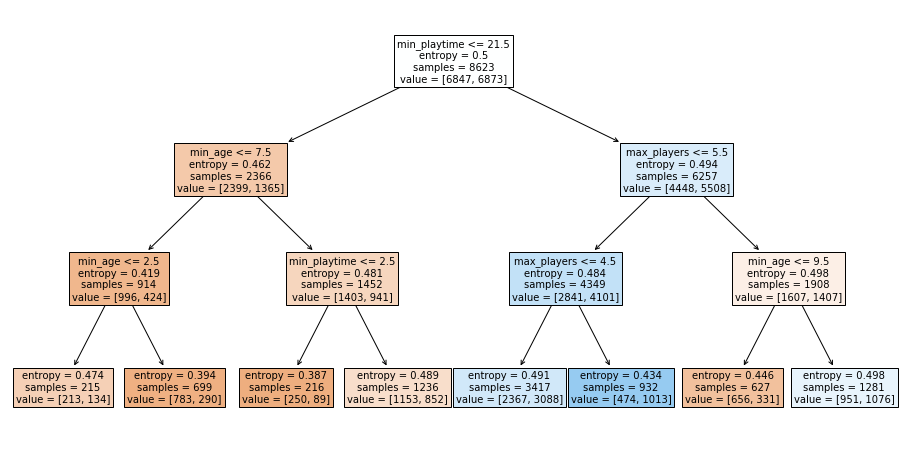

In [12]:
plt.figure(figsize=(16,8))
plot_tree(rf.estimators_[-2], 
          feature_names = x_names, fontsize = 10, filled =True)


In [13]:
rf = RandomForestClassifier()

rf.fit(bg_df[x_names], bg_df['quality_game'])




/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<div class="alert alert-info">
<h3> Your Turn</h3>
<p> Run the model again chaning the max_depth parameter. What does it mean to change this parameter? How do the results vary?
</div>



In [14]:
rf = RandomForestClassifier(max_depth        =  50
                           )

rf.fit(bg_df[x_names], bg_df['quality_game'])




/Users/nealcaren/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<div class="alert alert-info">
<h3> Your Turn</h3>
<p> Find the documentation for this function. What other parameters are available? Add one to your model.
</div>




In [15]:
rf = RandomForestClassifier(max_depth        = 100,
                            min_samples_split = .01,
                            max_features     = 'auto',
                            n_estimators     = 100
                           )

rf.fit(bg_df[x_names], bg_df['quality_game'])





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<div class="alert alert-info">
<h3> Your Turn</h3>
<p> Produce predicted values from your model and evaluate the accuracy score.
</div>





In [16]:
accuracy_score(rf.predict(bg_df[x_names]),bg_df['quality_game']) 



0.6668367346938775

## Time to supersize things

In [17]:
categories = ['category_cardgame',
       'category_wargame', 'category_fantasy', 'category_dice',
       'category_partygame', 'category_fighting', 'category_sciencefiction',
       'category_abstractstrategy', 'category_economic',
       'category_childrensgame', 'category_worldwarii', 'category_bluffing',
       'category_animals', 'category_humor', 'category_actiondexterity',
       'category_adventure', 'category_moviestvradiotheme',
       'category_medieval', 'category_deduction', 'category_miniatures']

mechanics = ['mechanic_dicerolling', 'mechanic_handmanagement',
       'mechanic_hexandcounter', 'mechanic_setcollection',
       'mechanic_variableplayerpowers', 'mechanic_none',
       'mechanic_tileplacement', 'mechanic_modularboard',
       'mechanic_carddrafting', 'mechanic_rollspinandmove',
       'mechanic_areacontrolareainfluence', 'mechanic_auctionbidding',
       'mechanic_simulation', 'mechanic_areamovement',
       'mechanic_simultaneousactionselection',
       'mechanic_actionpointallowancesystem', 'mechanic_cooperativeplay',
       'mechanic_pointtopointmovement', 'mechanic_partnerships',
       'mechanic_memory']

In [18]:
x_names = ['max_players', 'min_players', 'min_playtime', 
           'max_playtime', 'min_age'] 

many_xs = x_names + mechanics + categories
len(many_xs)

45

In [19]:
from sklearn.model_selection import GridSearchCV

#   "min_samples_leaf" : [10, 25, 50, .01],


param_dist = {"max_depth":         [25,  75],
              "min_samples_split": [10, .01],
              "max_features"     : ['auto', None],
              "n_estimators" :     [50, 100, 200]}


rfgs = GridSearchCV( RandomForestClassifier(),
                    param_dist,
                    cv = 3,
                    n_jobs = -1,
                    verbose=1 )

In [20]:
rfgs.fit(bg_df[many_xs], bg_df['quality_game'])

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   24.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [21]:
rfgs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rf_best = rfgs.best_estimator_

pd.DataFrame(rfgs.cv_results_).sort_values(by = 'rank_test_score', ascending = True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,1.265892,0.008651,0.159024,0.005386,25,auto,0.01,200,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.621994,0.682991,0.653981,0.652988,0.024914,1
3,0.341652,0.002629,0.047478,0.000883,25,auto,0.01,50,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.623743,0.679930,0.652450,0.652041,0.022942,2
15,0.345292,0.002441,0.048966,0.001356,75,auto,0.01,50,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.620026,0.681023,0.654418,0.651822,0.024971,3
16,0.677107,0.006902,0.085955,0.004152,75,auto,0.01,100,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.623743,0.678400,0.653106,0.651749,0.022336,4
17,1.300408,0.007882,0.157713,0.002969,75,auto,0.01,200,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.621338,0.682335,0.650481,0.651385,0.024912,5
2,1.762427,0.037904,0.205092,0.002904,25,auto,10,200,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.623306,0.679274,0.650919,0.651166,0.022851,6
4,0.645601,0.003358,0.086396,0.003114,25,auto,0.01,100,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.624617,0.677525,0.650481,0.650875,0.021603,7
1,0.919402,0.010463,0.106759,0.002503,25,auto,10,100,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.626366,0.678400,0.647419,0.650729,0.021372,8
14,1.910200,0.010632,0.219321,0.002183,75,auto,10,200,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.624180,0.677525,0.650262,0.650656,0.021781,9
13,0.945709,0.002846,0.113500,0.001534,75,auto,10,100,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.629209,0.671185,0.647200,0.649198,0.017196,10


In [23]:
pd.DataFrame(rf_best.feature_importances_, index = many_xs).sort_values(by = 0, ascending=False)

,0
max_playtime,0.119829
min_age,0.118391
mechanic_rollspinandmove,0.096257
min_playtime,0.074437
mechanic_none,0.066270
mechanic_areacontrolareainfluence,0.052093
max_players,0.049720
mechanic_handmanagement,0.044630
mechanic_variableplayerpowers,0.030096
min_players,0.027647


<div class="alert alert-info">
<h3> Your Turn</h3>
<p> Work with your group to find a best fitting model. Compare the accuracy with of logistic regression.
</div>






<div class="alert alert-info">
<h3> Bonus Challenge</h3>

<p> Bonus challenge: Use both features in the data set and ones you construct from a topic model!

</div>


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(lowercase   = True,
                             ngram_range = (1,1),
                             max_df      = .50,
                             stop_words   = 'english',
                             max_features = 1000)

In [25]:
vectorizer.fit(bg_df['description'])
bg_tf = vectorizer.transform(bg_df['description'])

In [26]:
lda_model = LatentDirichletAllocation(n_components = 10,
                                      max_iter     = 100,
                                      n_jobs       = -1,
                                      verbose      = 1)
lda_model.fit(bg_tf)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter: 100
iteration: 30 of max_iter: 100
iteration: 31 of max_iter: 100
iteration: 32 of max_iter: 100
iteration: 33 of 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=100,
                          mean_change_tol=0.001, n_components=10, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=1)

In [27]:
from pdtext.tm import topic_pred

bg_topics = topic_pred(lda_model, bg_tf, vectorizer)

In [28]:
bg_combo = pd.concat([bg_df, bg_topics], axis = 1)

In [29]:
from sklearn.model_selection import GridSearchCV

#   "min_samples_leaf" : [10, 25, 50, .01],


param_dist = {"max_depth":         [25,  75],
              "min_samples_split": [10, .01],
              "max_features"     : ['auto', None],
              "n_estimators" :     [50, 100, 200]}


rfgs = GridSearchCV( RandomForestClassifier(),
                    param_dist,
                    cv = 3,
                    n_jobs = -1,
                    verbose=1 )

topics = list(bg_topics.keys())

more_xs = many_xs + topics

rfgs.fit(bg_combo[more_xs], bg_df['quality_game'])


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [30]:
rf_best = rfgs.best_estimator_

pd.DataFrame(rfgs.cv_results_).sort_values(by = 'rank_test_score', ascending = True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,1.905428,0.026476,0.108162,0.001749,25,auto,10,100,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.636861,0.695015,0.651137,0.661006,0.024747,1
14,4.127332,0.035262,0.219074,0.019040,75,auto,10,200,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.633144,0.700918,0.648731,0.660933,0.028984,2
4,1.408282,0.029743,0.080591,0.000222,25,auto,0.01,100,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.632488,0.701793,0.647200,0.660496,0.029816,3
15,0.778199,0.023522,0.051151,0.006214,75,auto,0.01,50,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.637298,0.703542,0.640639,0.660496,0.030472,3
2,3.784486,0.047790,0.198962,0.004611,25,auto,10,200,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.632707,0.700044,0.648513,0.660423,0.028753,5
16,1.422556,0.029008,0.076730,0.000848,75,auto,0.01,100,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.629646,0.705072,0.644357,0.659694,0.032648,6
5,2.817243,0.073865,0.143592,0.005262,25,auto,0.01,200,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.631613,0.701137,0.645669,0.659475,0.030016,7
17,2.765754,0.039364,0.139277,0.002418,75,auto,0.01,200,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.627897,0.706603,0.643263,0.659257,0.034065,8
13,1.944656,0.047428,0.116518,0.012868,75,auto,10,100,"{'max_depth': 75, 'max_features': 'auto', 'min...",0.631395,0.692392,0.651356,0.658382,0.025394,9
3,0.736879,0.006720,0.048560,0.000296,25,auto,0.01,50,"{'max_depth': 25, 'max_features': 'auto', 'min...",0.628771,0.698732,0.646982,0.658163,0.029637,10


In [31]:
pd.DataFrame(rf_best.feature_importances_, index = more_xs).sort_values(by = 0, ascending=False)

,0
team_time_word,0.071449
city_points_money,0.068717
board_tiles_pieces,0.063695
dice_die_roll,0.062104
cards_card_hand,0.058158
race_play_space,0.056202
characters_character_cards,0.054905
units_map_war,0.053974
games_edition_rules,0.053674
war_combat_battle,0.052147
